# PMC - Funnel example

Importing libraries and setting the random seed for reproducibility.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pocomc as pc

np.random.seed(0)

## Defining the likelihood and prior

The $N$-dimensional funnel likelihood is given by $\mathcal{L}(x) = p_1(x_1)\Pi_{i=2}^{N}p(x_i|x_1)$ where $p_1$ is a standard normal distribution and $p$ is a normal distribution with zero mean and variance equal to $\exp(x_1)$.

Our prior is given by $\pi(x) = U(-10, 10)$ for all dimensions.

We use PMC to obtain samples $x_i \sim \mathcal{P}(x) \propto \mathcal{L}(x)\pi(x)$.

In [8]:
n_dim = 10  # Number of dimensions


###############################
### Defining the likelihood ###
###############################

def log_likelihood(x):
    a = 1.0
    b = 0.5
    first = -0.5 * (x[0] ** 2.0 / a ** 2.0) - 0.5 * np.log(2.0 * np.pi) - np.log(a)
    rest = -0.5 * np.sum(x[1:] ** 2.0 / np.exp(2 * b * x[0])) - 0.5 * np.log(2.0 * np.pi) - (n_dim - 1) * b * x[0]
    return first + rest


###############################
##### Defining the prior ######
###############################

lower = np.full(n_dim, -10.)  # lower bound of the prior
upper = np.full(n_dim, 10.)  # upper bound of the prior
bounds = np.c_[lower, upper]
const = np.sum(np.log(upper - lower))  # log of the Uniform density


def log_prior(x):
    if np.any((x < lower) | (x > upper)):  # If any dimension is out of bounds, the log prior is -infinity
        return -np.inf
    else:
        return -const

## Running PMC

We run PMC with 1000 walkers, initialized to be prior samples.

In [9]:
n_walkers = 1000
prior_samples = np.random.uniform(size=(n_walkers, n_dim), low=-10.0, high=10.0)

pmc = pc.Sampler(
    n_walkers,
    n_dim,
    log_likelihood,
    log_prior,
    bounds=bounds,
    random_state=0
)
pmc.run(prior_samples)

Iter: 2it [00:03,  1.55s/it, beta=3.22e-6, calls=7000, ESS=0.951, logZ=-.323, accept=0.26, N=6, scale=1.01, corr=0.712]/home/david/PycharmProjects/pocomc/pocomc/tools.py:76: UserWarning: Weights do not sum to 1 and have been renormalized.
  warnings.warn("Weights do not sum to 1 and have been renormalized.")
Iter: 33it [02:00,  3.71s/it, beta=0.977, calls=177000, ESS=0.95, logZ=-23.9, accept=0.235, N=1, scale=1.05, corr=0.945]   /home/david/PycharmProjects/pocomc/pocomc/scaler.py:386: RuntimeWarning: invalid value encountered in logaddexp
  p = np.exp(-np.logaddexp(0, -u[:, self.mask_both]))
/home/david/anaconda3/envs/pocomc/lib/python3.10/site-packages/numpy/linalg/linalg.py:2094: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
Iter: 34it [02:09,  3.81s/it, beta=1, calls=186000, ESS=0.991, logZ=-24.1, accept=0.249, N=5, scale=1.05, corr=0.727]   


## Visualizing the PMC posterior

We visualize the final PMC samples. The samples accurately represent the posterior.

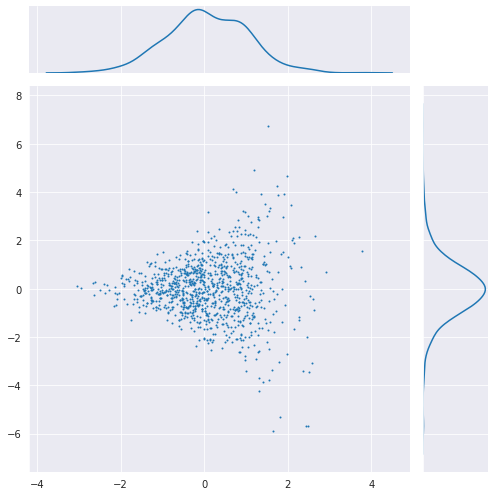

In [10]:
import seaborn as sns

x = pmc.results['samples']
g = sns.JointGrid(height=7)
g.ax_joint.scatter(x[:, 0], x[:, 1], s=1.0)
sns.kdeplot(x=x[:, 0], ax=g.ax_marg_x)
sns.kdeplot(y=x[:, 1], ax=g.ax_marg_y)
plt.show()

The trace plot shows PMC evolves the particles in each dimension.

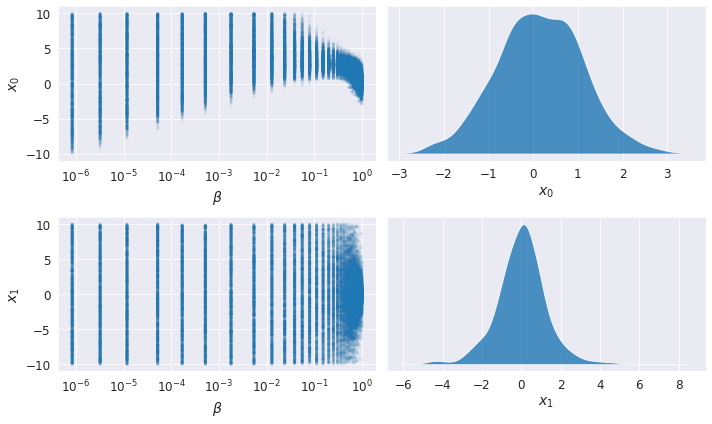

In [11]:
pc.plotting.trace(pmc.results, dims=[0, 1])
plt.show()

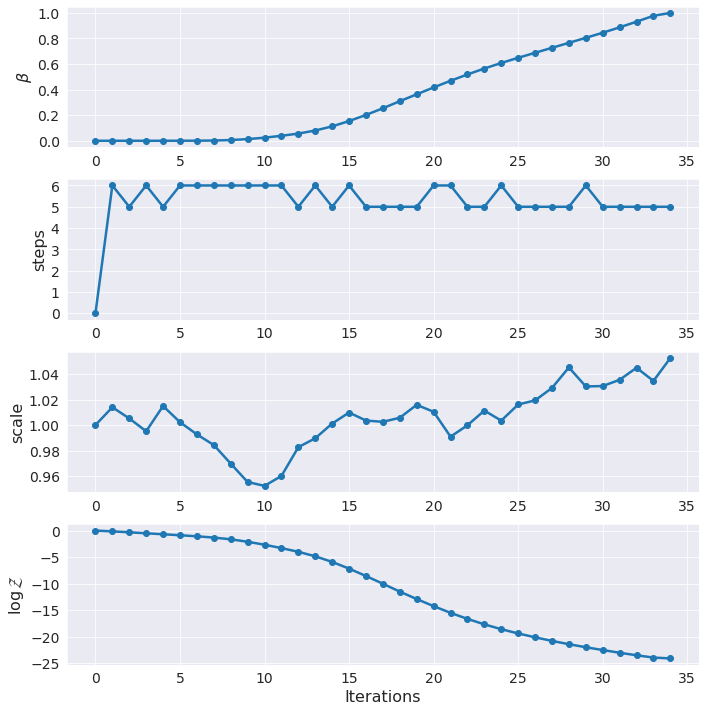

In [12]:
pc.plotting.run(pmc.results)
plt.show()